In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-precond-diagonal)

Here is an SPD matrix that arises from solving partial differential equations.

In [2]:
from scipy.sparse import sparray
import rogues
A = rogues.wathen(60, 60)
n = A.shape[0]
print(f"Matrix is {n} x {n} with {A.nnz} nonzeros")

Matrix is 11041 x 11041 with 170161 nonzeros


```{index} ! Julia; DiagonalPreconditioner
```

There is an easy way to use the diagonal elements of $\mathbf{A}$, or any other vector, as a diagonal preconditioner.

In [3]:
import scipy.sparse as sp
prec = sp.diags(1 / A.diagonal(), 0)

We now compare CG with and without the preconditioner.

No preconditioner: Finished in 0.33 sec
Diagonal preconditioner: Finished in 0.06 sec


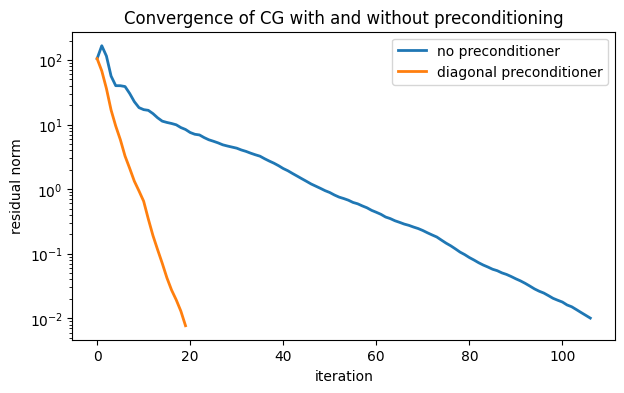

In [4]:
from scipy.sparse.linalg import cg
b = ones(n)
hist = lambda x: resid.append(norm(b - A @ x))
resid = [norm(b)]
start = timer()
x, _ = cg(A, b, rtol=1e-4, maxiter=200, callback=hist)
print(f"No preconditioner: Finished in {timer() - start:.2f} sec")
resid_plain = resid.copy()
resid = [norm(b)]
start = timer()
x, _ = cg(A, b, rtol=1e-4, maxiter=200, M=prec, callback=hist)
print(f"Diagonal preconditioner: Finished in {timer() - start:.2f} sec")
resid_prec = resid.copy()

semilogy(resid_plain, label="no preconditioner")
semilogy(resid_prec, label="diagonal preconditioner")
xlabel("iteration"), ylabel("residual norm")
legend(),  title("Convergence of CG with and without preconditioning");

The diagonal preconditioner cut down substantially on the number of iterations and the execution time.